In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from collections import Counter

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn')
sns.set(font_scale=1.5)

In [77]:
df=pd.read_csv('../data/wine.csv')

In [78]:
#가져온 데이터의 행과 열에 대한 정보 파악
df.shape

(1599, 12)

In [79]:
#첫 5행 출력
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [80]:
#데이터셋 특성(feature)을 보여줌
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
#데이터셋의 레이블인 quality가 범주형 데이터이기 때문에 인코딩 작업이 필요
#enumerate를 사용해 클래스 레이블을 0부터 할당
class_mapping={label:idx for idx,label in
              enumerate(np.unique(df['quality']))}
class_mapping

{'bad': 0, 'good': 1}

In [82]:
#매핑 딕셔너리를 사용해 레이블 데이터를 정수로 변환
df['quality']=df['quality'].map(class_mapping)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [83]:
#데이터 이상치 탐지
#이상치란 말 그대로 문제가 있는 데이터를 의미.
#머신러닝에서는 이러한 이상치 데이터 때문에 모델의 성능이 크게 좌우됨
#이상치 제거는 '사분위 값의 편차'를 이용해 제거
#사분위 값을 통해 최대값과 최소값을 구하면 그 값보다 크거나 작으면 OUTLIER라고 함
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)#1/4지점
        Q3 = np.percentile(df[col], 75)#3/4지점
        IQR = Q3 - Q1#IQR 계산
        
        outlier_step = 1.5 * IQR
        
        #IQR에 1.5 곱셈 연산 후 각각 덧셈 및 뺄셈 연산을 한 값보다 크거나 작으면 이상치
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers

In [84]:
outliers_to_drop=detect_outliers(df,2,['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [85]:
df.loc[outliers_to_drop]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,0
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,1
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,1
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,1
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,1
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,0
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,1


In [86]:
#이상치 제거 실행
#이상치 제거 이후 1599개 샘플에서 1533개 데이터로 축소된 것을 확인할 수 있다.
df=df.drop(outliers_to_drop, axis=0).reset_index(drop=True)
df.shape

(1566, 12)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Wine'}>

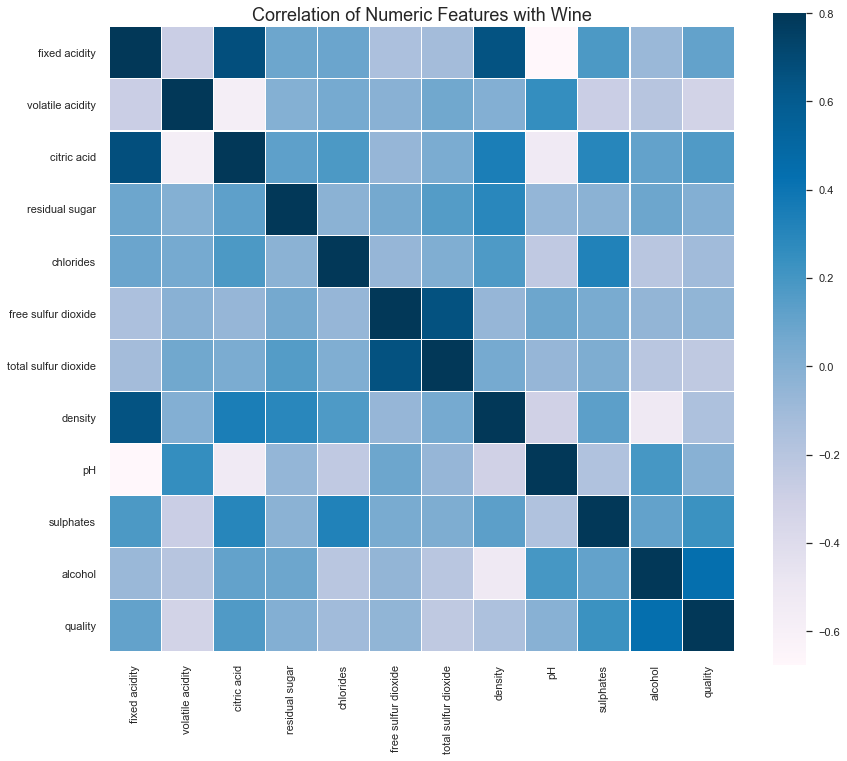

In [87]:
#feature간의 상관관계 시각화
corr_data = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]

colormap = plt.cm.PuBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Wine',y=1,size=18)
sns.heatmap(corr_data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8)

Index(['quality', 'alcohol', 'sulphates', 'citric acid', 'fixed acidity',
       'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides', 'density',
       'total sulfur dioxide'],
      dtype='object')


<AxesSubplot:>

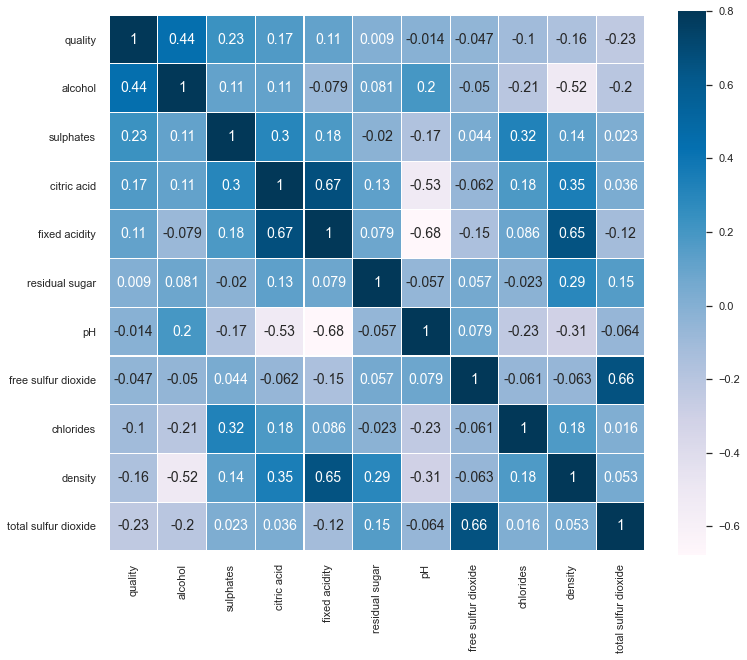

In [88]:
#feature간의 상관관계 시각화 및 수치화 표현
k= 11
cols = corr_data.corr().nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (12,10))
sns.heatmap(cm, vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':14},yticklabels = cols.values)

In [ ]:
#고정산도(fixed acidity)와 시르트산(critic acid)는 서로 양의 상관관계에 놓여있다.
#밀도(density)와 알코올(alcohol)은 서로 음의 상관관계에 놓여있다.